# Лабораторная работа 3. Классификация. Нейронные сети
### Описание работы
**Цель работы:** изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard. 

**Постановка задачи:**

1. Необходимо выбрать и подготовить датасет для классификации, затем построить классификационные модели с помощью пяти методов:

   * Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);
   * Деревья решений (Decision Tree);
   * Линейный дискриминантный анализ (Linear Discriminant Analysis);
   * Метод опорных векторов (Support Vector Machines);
   * Метод ближайших соседей (k-Nearest Neighbors);

2. Затем сравните качество работы классификаторов с помощью следующих метрик:

   * Accuracy (точность),
   * Precision (доля правильно классифицированных положительных примеров),
   * Recall (чувствительность, доля верно найденных положительных примеров),
   * F1-Score (среднее гармоническое precision и recall),
   * Площадь под кривой ROC (AUC-ROC).

3. Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.
4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.


#### **О датасете:**

В работе используется датасет Water Quality, содержащий измерения химических и биологических показателей качества воды. Каждая строка представляет собой анализ одной пробы воды, включающий концентрации различных веществ и примесей.

Цель датасета - определить, является ли вода безопасной для употребления.
Поэтому целевой переменной выступает столбец is_safe, принимающий значения:

* 1 - вода признана безопасной;
* 0 - вода признана небезопасной.

Датасет подходит для решения задачи бинарной классификации, поскольку необходимо классифицировать воду по параметрам её состава.

Всего датасет содержит 20 входных признаков (исключая целевой столбец) и около 8 тысяч записей. Все признаки являются числовыми и непрерывными - это концентрации химических элементов или биологических загрязнителей.

**Столбцы:**

1. aluminium - концентрация алюминия в воде. Повышенные значения могут быть токсичными при длительном употреблении.
2. ammonia - содержание аммиака. Высокие концентрации свидетельствуют о загрязнении воды органическими веществами, сточными выбросами или продуктами распада белков.
3. arsenic - количество мышьяка. Один из наиболее опасных элементов; даже небольшие концентрации делают воду небезопасной.
4. barium - концентрация бария. Чрезмерное содержание влияет на сердечно-сосудистую систему.
5. cadmium - показатель содержания кадмия - токсичного тяжёлого металла.
6. chloramine - хлорамины часто используются в качестве дезинфектанта. Слишком высокие уровни опасны для желудочно-кишечного тракта.
7. chromium - содержание хрома. Некоторые его формы (например, Cr(VI)) имеют канцерогенные свойства.
8. copper - концентрация меди. Умеренные уровни безопасны, но превышение вызывает раздражение ЖКТ.
9. flouride - уровень фторида. В малых дозах полезен, но превышение ведет к флюорозу.
10. bacteria - количество бактериальных клеток в пробе. Биологическое загрязнение - один из ключевых факторов небезопасной воды.
11. viruses - показатель вирусного загрязнения. Логично ожидается корреляция с is_safe.
12. lead - содержание свинца. Высокотоксичный элемент, особенно опасный для детей и беременных.
13. nitrates - концентрация нитратов - химических соединений, проникающих в воду из удобрений и отходов.
14. nitrites - нитриты - производные нитратов; при высоком уровне нарушают транспорт кислорода кровью.
15. mercury - содержание ртути. Один из самых токсичных тяжёлых металлов.
16. perchlorate - перхлорат влияет на работу щитовидной железы при превышении нормы.
17. radium - концентрация радиоактивного радиума (показатель радиационного загрязнения).
18. selenium - содержание селена. Умеренное количество полезно, но высокие концентрации токсичны.
19. silver - количество серебра. Металл обладает антимикробными свойствами, но превышение нормы вредно.
20. uranium - концентрация урана. Радиоактивный тяжёлый металл, опасный даже в малых концентрациях.
21. is_safe (целевой признак) - бинарная переменная, определяющая состояние проб воды, где 1 - безопасная вода, 0 - небезопасная вода.


### Ход работы
Загрузим датасет


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

data = pd.read_csv("waterQuality1.csv") 

data.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Проведем первичную проверку структуры датасета, чтобы понять, какие типы данных содержатся в столбцах, есть ли пропущенные значения, каково количество объектов и признаков, а также как распределён целевой класс.

In [4]:
print("Общая информация о данных:")
data_info = data.info()

print("\nКоличество пропущенных значений в каждом столбце:")
missing_values = data.isnull().sum()
missing_values

print("\nРаспределение классов целевой переменной is_safe:")
class_distribution = data['is_safe'].value_counts()
class_distribution


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

Заметим, что в результатах присутствуют значения "#NUM!" и отсутствуют результаты по количеству пропущенных значений в каждом столбце. Поэтому преобразуем неправильные строки в NaN и снова проверим. 

In [6]:
data = data.replace("#NUM!", np.nan)

data["ammonia"] = pd.to_numeric(data["ammonia"], errors="coerce")

data["is_safe"] = pd.to_numeric(data["is_safe"], errors="coerce")

print("Количество пропущенных значений после очистки:")
missing_after = data.isnull().sum()
print(missing_after)

print("\nРаспределение классов после очистки:")
class_distribution_clean = data["is_safe"].value_counts(dropna=False)
print(class_distribution_clean)


Количество пропущенных значений после очистки:
aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

Распределение классов после очистки:
is_safe
0.0    7084
1.0     912
NaN       3
Name: count, dtype: int64


Некорректные значения успешно заменены на NaN. Теперь pandas корректно определяет их как отсутствующие данные.

Столбцы ammonia и is_safe получили числовой тип.
Это важно, поскольку числовые признаки должны быть float для моделей, а целевая переменная - бинарный класс (int).

Далее обработаем пропуски. Используем два решения:
1. Удалим строки, где отсутствует значение is_safe. Это логично, так как целевой признак не может быть неизвестным - такие строки использовать в работе нельзя.




In [7]:
data = data.dropna(subset=["is_safe"])

2. Заполним пропуски в числовых признаках медианой. Медиана устойчивее к выбросам, чем среднее.

In [8]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

Повторно проверим пропуски после обработки

In [9]:
print("Пропуски после обработки:")
print(data.isnull().sum())

Пропуски после обработки:
aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


Также посмотрим описательную статистику признаков. Это позволит увидеть возможные аномалии.

In [10]:
print("\nОписательная статистика:")
data.describe()


Описательная статистика:


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


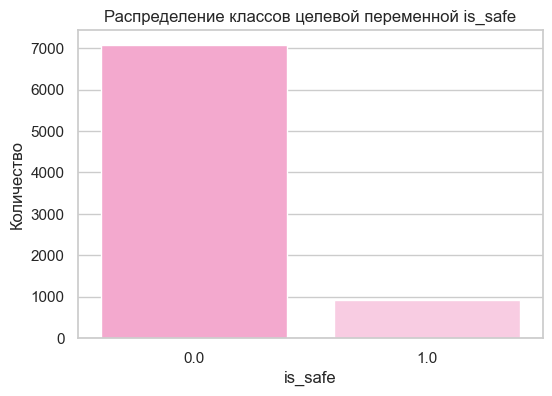

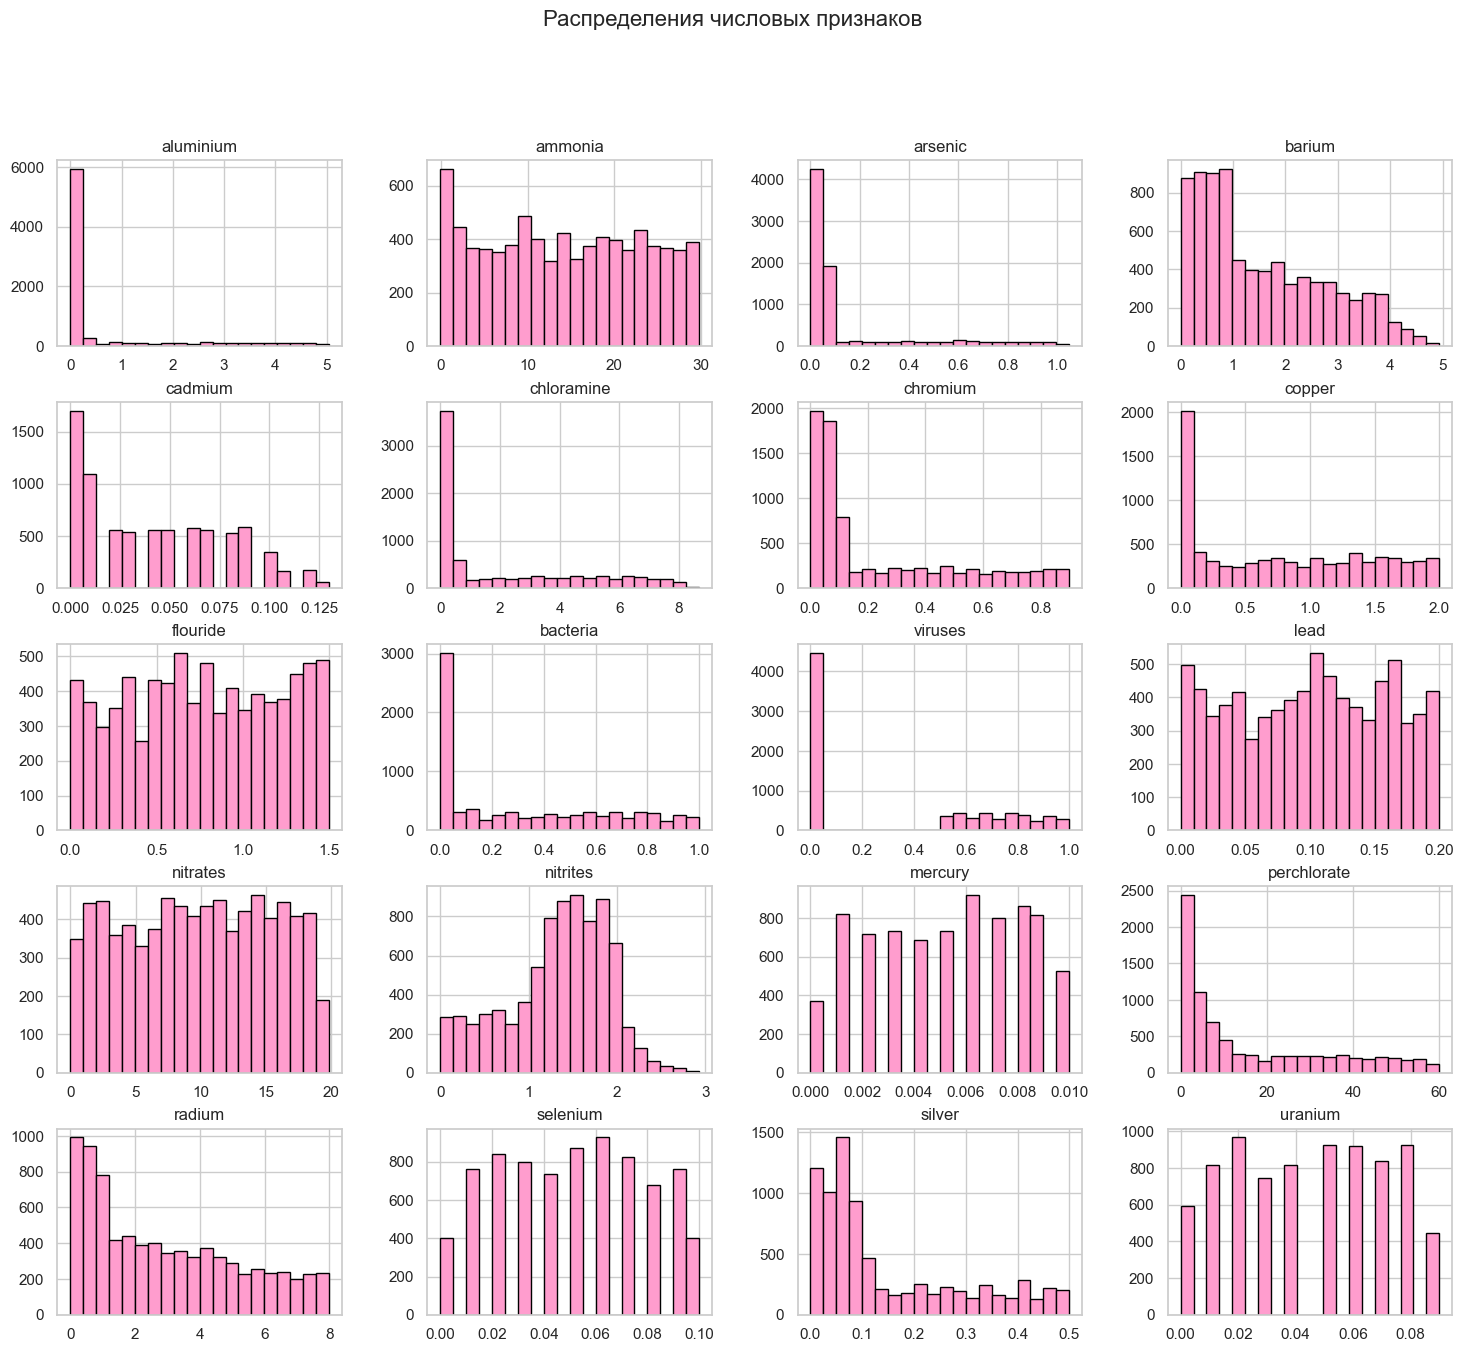

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x="is_safe", hue="is_safe", data=data, palette=["#ff9dce", "#ffc5e2"], legend=False)
plt.title("Распределение классов целевой переменной is_safe")
plt.xlabel("is_safe")
plt.ylabel("Количество")
plt.show()

numeric_cols = data.select_dtypes(include=[float, int]).columns
numeric_cols = numeric_cols.drop("is_safe")

data[numeric_cols].hist(figsize=(18, 15), bins=20, color="#ff9dce", edgecolor="black")
plt.suptitle("Распределения числовых признаков", fontsize=16)
plt.show()



По гистограммам видно: 
* Большинство химических концентраций имеют смещённое вправо распределение
(много нулевых или малых значений и длинный хвост высоких концентраций).
* Это естественно для экологических данных: большинство проб содержат минимальные концентрации, но иногда встречаются выбросы.
* Разные признаки имеют разный масштаб (от сотых до десятков), что подтверждает необходимость стандартизации перед обучением моделей.

Также проведем корреляционный анализ признаков.

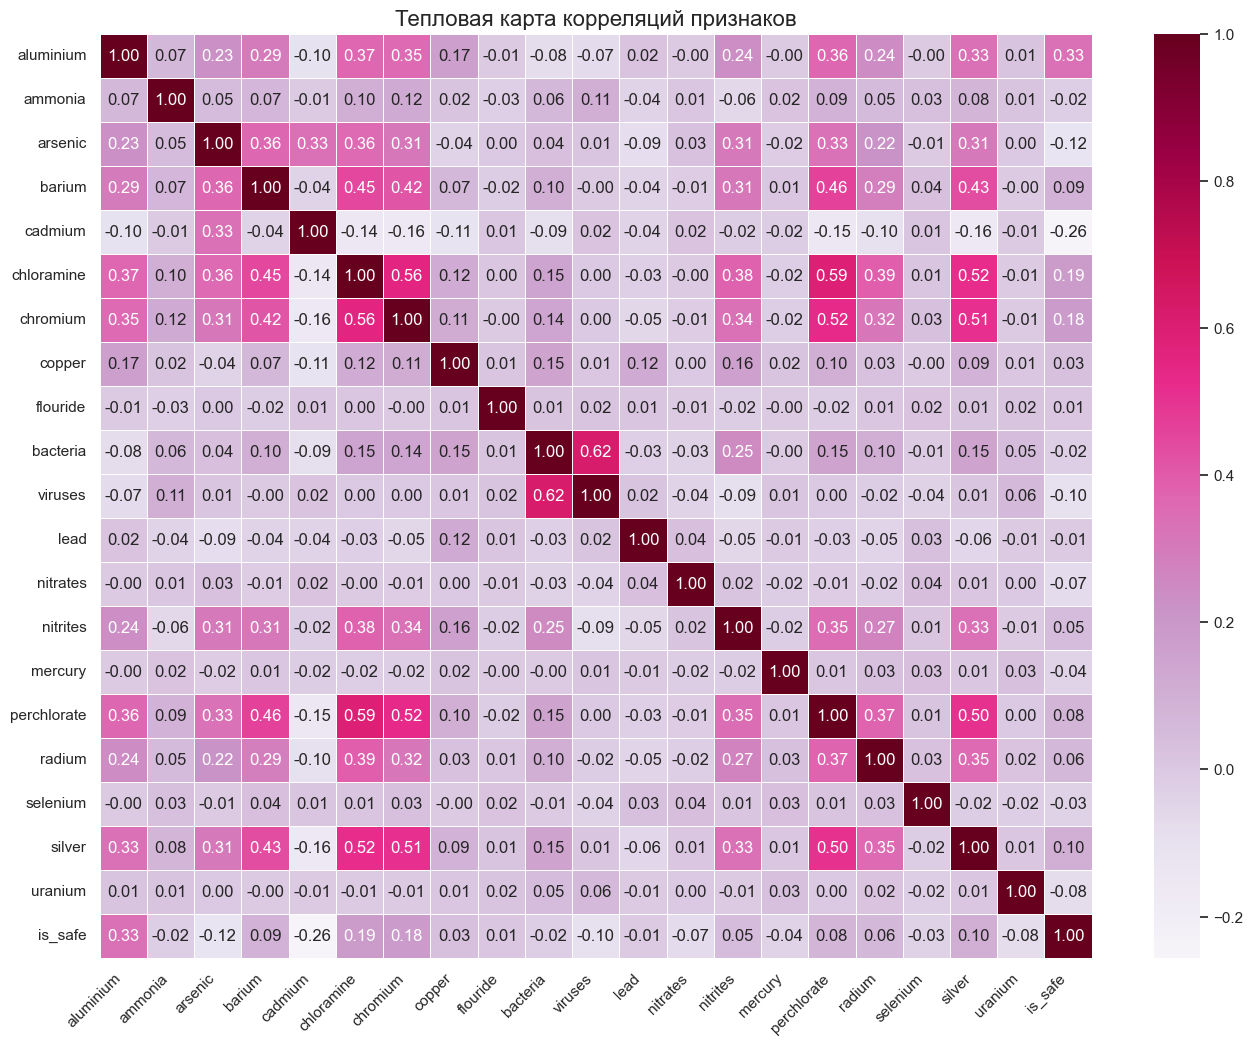

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="PuRd",
    linewidths=0.5,
    cbar=True
)
plt.title("Тепловая карта корреляций признаков", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()



Теперь перед построением модели разделим данные на выборки и стандартизируем признаки. Масштабирование позволяет выровнять диапазоны значений и избежать ситуации, когда один признак начинается от долей единицы, а другой измеряется десятками, что может исказить работу алгоритмов.

Для начала разделим данные на признаки и целевую переменную:
* X - все столбцы, кроме is_safe;
* y - столбец is_safe.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop("is_safe", axis=1)
y = data["is_safe"]



Разделим на обучающую и тестовую выборки

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Размер обучающей выборки X_train:", X_train.shape)
print("Размер тестовой выборки X_test:", X_test.shape)
print("Размер y_train:", y_train.shape)
print("Размер y_test:", y_test.shape)


Размер обучающей выборки X_train: (5597, 20)
Размер тестовой выборки X_test: (2399, 20)
Размер y_train: (5597,)
Размер y_test: (2399,)


Стандартизируем признаки:
* приводим признаки к нулевому среднему и единичному стандартному отклонению;
* масштабирование выполняется ТОЛЬКО по обучающей выборке (fit на X_train), а к тестовой применяется только transform, чтобы избежать утечки информации.

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Просмотрим несколько строк стандартизированных признаков 

In [21]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

print("\nПервые строки стандартизированных признаков (X_train_scaled):")
X_train_scaled_df.head()



Первые строки стандартизированных признаков (X_train_scaled):


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,-0.457211,0.484427,-0.278636,-0.597525,0.191898,-0.653126,-0.765570,0.559364,0.516595,-0.965254,1.580817,-0.235573,-0.061074,-0.946650,0.607689,-0.847911,-0.889708,-0.699647,-0.747146,1.313499
1,-0.480634,-0.038195,-0.599279,-0.466027,1.021817,-0.797655,-0.875837,-0.997894,0.539486,-0.965254,1.156443,1.173615,1.477965,-0.615291,1.280868,-0.582579,0.355102,0.696902,-0.677056,-1.650280
2,-0.465019,-1.589201,-0.318716,-0.367403,-0.084742,-0.731250,-0.545037,1.505933,1.569589,-0.021783,-0.848723,0.228428,0.004108,1.093826,0.271100,-0.870022,-0.265149,1.395176,-0.887325,0.943026
3,-0.308869,0.728317,2.046028,0.536648,-0.914661,0.518735,-0.361258,-1.150566,1.432242,0.708646,0.599452,-1.696317,1.267931,0.675267,0.271100,-0.289467,0.544623,-0.350509,0.093933,-0.168390
4,-0.519671,0.708086,-0.398877,-0.564651,-0.638021,-0.836718,-0.728815,1.017381,0.402139,-0.965254,1.554293,-0.458981,1.525041,-0.876890,0.271100,-0.877959,-1.139531,-0.350509,-0.677056,-1.650280


### Наивный байесовский классификатор (GaussianNB)

Наивный байесовский классификатор (Naive Bayes classifier) - это вероятностная модель, основанная на формуле Байеса и предположении, что признаки независимы друг от друга при условии класса.

Несмотря на "наивное" предположение о независимости признаков, метод показывает высокую эффективность в задачах классификации, в особенности когда:
* признаки числовые,
* распределение приближено к нормальному (GaussianNB).

Визуальный анализ распределений показал, что ни один из признаков не приближен к нормальному распределению. Большинство признаков имеют выраженную правостороннюю асимметрию, логнормальное или экспоненциальное распределение, что является типичным для экологических данных. Несмотря на это, GaussianNB может использоваться как базовая модель, однако его предположение о нормальности признаков нарушено, что потенциально снижает точность и повышает чувствительность модели. Для данного типа данных более подходящими являются методы, не требующие нормальности распределений: деревья решений, SVM с RBF, KNN и нейронные сети.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parameters = {
    'var_smoothing': np.logspace(-12, 0, 13)
}

results = []

for p in parameters['var_smoothing']:
    
    model_nb = GaussianNB(var_smoothing=p)
    model_nb.fit(X_train_scaled, y_train)
    y_predNB = model_nb.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_predNB)
    recall = recall_score(y_test, y_predNB)
    precision = precision_score(y_test, y_predNB)
    f1 = f1_score(y_test, y_predNB)
    roc_auc = roc_auc_score(y_test, y_predNB)

    results.append({
        'var_smoothing': p,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    })

results_NB = pd.DataFrame(results)

results_NB



,var_smoothing,accuracy,precision,recall,f1_score,roc_auc
0,1.000000e-12,0.842434,0.377358,0.583942,0.458453,0.729853
1,1.000000e-11,0.842434,0.377358,0.583942,0.458453,0.729853
2,1.000000e-10,0.842434,0.377358,0.583942,0.458453,0.729853
3,1.000000e-09,0.842434,0.377358,0.583942,0.458453,0.729853
4,1.000000e-08,0.842434,0.377358,0.583942,0.458453,0.729853
5,1.000000e-07,0.842434,0.377358,0.583942,0.458453,0.729853
6,1.000000e-06,0.842434,0.377358,0.583942,0.458453,0.729853
7,1.000000e-05,0.842434,0.377358,0.583942,0.458453,0.729853
8,1.000000e-04,0.842434,0.377358,0.583942,0.458453,0.729853
9,1.000000e-03,0.842851,0.378251,0.583942,0.459110,0.730088


Проанализируем полученный результат:

Наивный байесовский классификатор показал стабильные результаты во всём диапазоне малых значений гиперпараметра var_smoothing, обеспечивая средний уровень качества классификации с Accuracy около 0.842 и F1-score около 0.458. Незначительное увеличение var_smoothing до 1e-3–1e-1 привело к умеренному улучшению отдельных метрик, что свидетельствует о положительном эффекте сглаживания дисперсии. При дальнейшем увеличении var_smoothing до 1 модель демонстрирует рост Accuracy за счёт смещения в сторону доминирующего класса, что сопровождается снижением Recall и ROC-AUC. Таким образом, оптимальными значениями параметра можно считать область 1e-3–1e-1, обеспечивающую наиболее сбалансированное качество классификации.

##### Иные модели не рассматриваем, так как:
* MultinomialNB - для дискретных признаков, часто используется с текстовыми данными.
* ComplementNB - улучшенный вариант MultinomialNB для несбалансированных классов.
* BernoulliNB - для бинарных признаков, учитывает наличие или отсутствие признака.


### Классификация методом дерева решений (Decision Tree Classifier)
Дерево решений (Decision Tree Classifier) - это алгоритм классификации, который рекурсивно разбивает пространство признаков на области, где объекты принадлежат одному классу.

Метод основан на последовательном выборе признаков, которые лучше всего разделяют классы. Разбиения выполняются с использованием критериев:
* Gini impurity (критерий Джини) - по умолчанию;
* Entropy (кросс-энтропия) - альтернативный вариант.

Выполним настройку дерева решений с подбором двух гиперпараметров:
* criterion ∈ {gini, entropy, log_loss}
* max_depth ∈ {None, 1, 2, 3, 4, 5}

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3, 4, 5]
}

results = []

for crit in parameters['criterion']:
    for depth in parameters['max_depth']:
        
        model_tree = DecisionTreeClassifier(
            criterion=crit,
            max_depth=depth,
            random_state=42
        )

        model_tree.fit(X_train_scaled, y_train)
        y_predTree = model_tree.predict(X_test_scaled)

        results.append({
            'criterion': crit,
            'max_depth': depth,
            'accuracy': accuracy_score(y_test, y_predTree),
            'precision': precision_score(y_test, y_predTree, zero_division=0),
            'recall': recall_score(y_test, y_predTree, zero_division=0),
            'f1': f1_score(y_test, y_predTree, zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_predTree)
        })

results_Tree = pd.DataFrame(results)
results_Tree



,criterion,max_depth,accuracy,precision,recall,f1,roc_auc
0,gini,NaN,0.954981,0.776667,0.850365,0.811847,0.909418
1,gini,1.0,0.885786,0.000000,0.000000,0.000000,0.500000
2,gini,2.0,0.919133,0.642857,0.656934,0.649819,0.804938
3,gini,3.0,0.944143,0.911765,0.565693,0.698198,0.779317
4,gini,4.0,0.947478,0.855769,0.649635,0.738589,0.817759
5,gini,5.0,0.954564,0.826087,0.762774,0.793169,0.871034
6,entropy,NaN,0.957899,0.805654,0.832117,0.818671,0.903117
7,entropy,1.0,0.885786,0.000000,0.000000,0.000000,0.500000
8,entropy,2.0,0.919133,0.642857,0.656934,0.649819,0.804938
9,entropy,3.0,0.944143,0.911765,0.565693,0.698198,0.779317


Проанализируем полученный результат:

Дерево решений показало высокое качество классификации на данном датасете, причём наилучшие результаты достигаются при отсутствии ограничения глубины или при глубине 5. Метрика accuracy в этих случаях превышает 0.95, а f1-score находится в диапазоне 0.79–0.82, что свидетельствует о хорошем балансе между точностью и полнотой. Критерии gini, entropy и log_loss демонстрируют практически одинаковое качество при одинаковых значениях глубины, что указывает на слабую чувствительность модели к выбору критерия разбиения. Малые значения max_depth (1-2) приводят к резкому падению precision, recall и f1-score, что отражает недообучение модели. Таким образом, оптимальными являются модели с глубиной 4–5 или без ограничения глубины, обеспечивающие наиболее стабильные и высокие результаты классификации.

### Линейный дискриминантный анализ (LDA)

Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA) - это линейный метод классификации, основанный на построении проекции признаков в новое пространство, где классы разделяются максимально хорошо.

LDA - одновременно метод:
* снижения размерности (по принципу максимизации межклассовой дисперсии),
* линейной классификации.

Предположения LDA:

1. Признаки распределены нормально внутри каждого класса.
В нашем датасете это нарушено (распределения сильно асимметричны).
2. Ковариационная матрица одинакова для всех классов.
3. Линейная разделимость классов в новом пространстве.

Несмотря на нарушение предположений, LDA обычно показывает стабильные результаты на практических данных, особенно при большом количестве числовых признаков.

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parameters = {
    'solver': ['svd', 'lsqr'],
}

results = []

for s in parameters['solver']:

    model_LDA = LinearDiscriminantAnalysis(solver=s)

    model_LDA.fit(X_train_scaled, y_train)
    y_predLDA = model_LDA.predict(X_test_scaled)

    results.append({
        'solver': s,
        'accuracy': accuracy_score(y_test, y_predLDA),
        'precision': precision_score(y_test, y_predLDA, zero_division=0),
        'recall': recall_score(y_test, y_predLDA, zero_division=0),
        'f1': f1_score(y_test, y_predLDA, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_predLDA)
    })

results_LDA = pd.DataFrame(results)
results_LDA



,solver,accuracy,precision,recall,f1,roc_auc
0,svd,0.90371,0.617486,0.412409,0.49453,0.689734
1,lsqr,0.90371,0.617486,0.412409,0.49453,0.689734


Проанализируем полученный результат:

Линейный дискриминантный анализ показал одинаковые результаты для обоих решателей (svd и lsqr), что говорит о слабой чувствительности модели к выбору solver на данном датасете. Достигнутая accuracy ≈ 0.904 демонстрирует хорошую общую точность, однако сравнительно низкие значения recall (0.41) и f1-score (0.49) указывают на то, что модель заметно хуже распознаёт меньший класс (безопасную воду). Значение ROC-AUC ≈ 0.69 подтверждает среднюю способность модели различать классы. В целом, LDA показывает стабильное, но умеренное качество классификации, уступая дереву решений и близко соответствуя результатам GaussianNB.

### Классификация методом опорных векторов (SVM)

Метод опорных векторов (Support Vector Machine, SVM) - один из самых мощных и устойчивых методов классификации. Он строит разделяющую гиперплоскость между классами так, чтобы максимизировать зазор (margin) - расстояние от гиперплоскости до ближайших точек классов (опорных векторов).

**Ядровой трюк**

Если классы нелинейно разделимы (а в нашем датасете именно так), используется kernel trick:
* линейное ядро - для простых данных,
* полиномиальное ядро,
* RBF (Gaussian) ядро - универсальное решение,
* сигмоидальное ядро.

Почему SVM подходит для нашего датасета?
* Признаки НЕ нормальны, сильно асимметричны (GaussianNB и LDA имеют ограничения).
* В данных присутствуют сложные нелинейные зависимости.
* SVM отлично работает при дисбалансе классов благодаря margin-maximization.
* Масштабирование признаков уже выполнено (это важно, т.к. SVM чувствителен к масштабу).

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

results = []

for k in parameters['kernel']:
    for g in parameters['gamma']:
        
        model_SVM = SVC(
            kernel=k,
            gamma=g,
            random_state=42
        )

        model_SVM.fit(X_train_scaled, y_train)
        y_predSVM = model_SVM.predict(X_test_scaled)

        results.append({
            'kernel': k,
            'gamma': g,
            'accuracy': accuracy_score(y_test, y_predSVM),
            'precision': precision_score(y_test, y_predSVM, zero_division=0),
            'recall': recall_score(y_test, y_predSVM, zero_division=0),
            'f1': f1_score(y_test, y_predSVM, zero_division=0),
            'roc_auc': roc_auc_score(y_test, y_predSVM)
        })

results_SVM = pd.DataFrame(results)
results_SVM



,kernel,gamma,accuracy,precision,recall,f1,roc_auc
0,linear,scale,0.912880,0.764228,0.343066,0.473552,0.664709
1,linear,auto,0.912880,0.764228,0.343066,0.473552,0.664709
2,poly,scale,0.929554,0.872340,0.448905,0.592771,0.720217
3,poly,auto,0.929554,0.872340,0.448905,0.592771,0.720217
4,rbf,scale,0.939141,0.872093,0.547445,0.672646,0.768546
5,rbf,auto,0.939141,0.872093,0.547445,0.672646,0.768546
6,sigmoid,scale,0.851605,0.279570,0.189781,0.226087,0.563361
7,sigmoid,auto,0.851605,0.279570,0.189781,0.226087,0.563361


Проанализируем полученный результат:

Метод опорных векторов показал значительную зависимость качества классификации от выбора ядра. Наилучшие результаты демонстрирует ядро RBF, обеспечивающее accuracy ≈ 0.939, высокую precision (0.87) и наиболее сбалансированный f1-score (0.67) среди всех вариантов. Полиномиальное ядро (poly) также показывает хорошие метрики, но уступает RBF по полноте (recall) и F1. Линейное ядро даёт среднее качество, правильно классифицируя большую часть объектов, но хуже выявляя меньший класс (recall ≈ 0.34). Ядро sigmoid показало наихудшие результаты среди всех, что типично для этого ядра на реальных данных.

Параметр gamma ("scale" и "auto") не оказывает влияния на качество во всех случаях, что видно по идентичным строкам таблицы. В целом, SVM с RBF является одной из лучших моделей на данном датасете за счёт хорошего баланса метрик и высокой площади ROC-AUC (0.768).

### Метод k-ближайших соседей (k-Nearest Neighbors, KNN).

Метод k-ближайших соседей (k-Nearest Neighbors, KNN) - это ленивый (instance-based) алгоритм классификации, который не строит модель заранее.
Вместо этого классификация происходит в момент запроса, на основе расстояний между объектами.

Чтобы классифицировать новый объект:
1. Вычислить расстояния от него до всех объектов обучающей выборки.
2. Найти k ближайших соседей (обычно по евклидову расстоянию).
3. Выбрать класс, который встречается среди соседей чаще всего.

Важные свойства KNN:
* метод чувствителен к масштабу признаков;
* хорошо работает в гладких, хорошо структурированных данных;
* плохо работает при высоких размерностях и большом количестве наблюдений (дорог по вычислениям);
* значение параметра k сильно влияет на качество модели:
  * малый k - переобучение,
  * большой k - недообучение.


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

parameters = {
    'n_neighbors': [3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

results = []

for n in parameters['n_neighbors']:
    for w in parameters['weights']:
        for a in parameters['algorithm']:
            
            model_KN = KNeighborsClassifier(
                n_neighbors=n,
                weights=w,
                algorithm=a
            )

            model_KN.fit(X_train_scaled, y_train)
            y_predKN = model_KN.predict(X_test_scaled)

            results.append({
                'n_neighbors': n,
                'weights': w,
                'algorithm': a,
                'accuracy': accuracy_score(y_test, y_predKN),
                'precision': precision_score(y_test, y_predKN, zero_division=0),
                'recall': recall_score(y_test, y_predKN, zero_division=0),
                'f1': f1_score(y_test, y_predKN, zero_division=0),
                'roc_auc': roc_auc_score(y_test, y_predKN)
            })

results_KN = pd.DataFrame(results)
results_KN



,n_neighbors,weights,algorithm,accuracy,precision,recall,f1,roc_auc
0,3,uniform,auto,0.896207,0.568306,0.379562,0.455142,0.671193
1,3,uniform,ball_tree,0.896207,0.568306,0.379562,0.455142,0.671193
2,3,uniform,kd_tree,0.896207,0.568306,0.379562,0.455142,0.671193
3,3,uniform,brute,0.896207,0.568306,0.379562,0.455142,0.671193
4,3,distance,auto,0.883285,0.486364,0.390511,0.433198,0.668667
5,3,distance,ball_tree,0.883285,0.486364,0.390511,0.433198,0.668667
6,3,distance,kd_tree,0.883285,0.486364,0.390511,0.433198,0.668667
7,3,distance,brute,0.883285,0.486364,0.390511,0.433198,0.668667
8,4,uniform,auto,0.904544,0.736842,0.255474,0.379404,0.621855
9,4,uniform,ball_tree,0.904544,0.736842,0.255474,0.379404,0.621855


Проанализируем полученный результат:

Метод k-ближайших соседей показал среднее качество классификации по сравнению с другими моделями. Наилучшие результаты достигаются при n_neighbors = 5, где accuracy составляет ≈ 0.907, а f1-score близок к 0.485, что является лучшим среди всех конфигураций KNN. Параметр weights оказывает заметное влияние: схема uniform стабильно превосходит distance, обеспечивая более высокие значения precision и f1. Выбор алгоритма поиска соседей (auto, ball_tree, kd_tree, brute) не влияет на метрики, что ожидаемо при стандартизированных данных. Увеличение числа соседей приводит к снижению Recall, что означает ухудшение способности выявлять меньший класс. В целом, KNN работает хуже SVM и дерева решений, но показывает устойчивые результаты при n_neighbors=5 и weights='uniform'.
### Реализуем и протестируем нейронную сеть на TensorFlow, исследуем эффект настройки гиперпараметров и визуализируем процесс обучения с помощью инструмента TensorBoard.


In [ ]:
import os
import datetime

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

BASE_LOG_DIR = r"C:\ml_tensorboard_logs"
os.makedirs(BASE_LOG_DIR, exist_ok=True)

log_dir = os.path.join(
    BASE_LOG_DIR,
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)
os.makedirs(log_dir, exist_ok=True)

tensorboard_cb = callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
    profile_batch=0
)

earlystop_cb = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model = tf.keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.Precision(name="precision")
    ]
)

history = model.fit(
    X_train_scaled,
    y_train.values if hasattr(y_train, "values") else y_train,
    validation_data=(X_test_scaled, y_test.values if hasattr(y_test, "values") else y_test),
    epochs=50,
    batch_size=32,
    callbacks=[tensorboard_cb, earlystop_cb],
    verbose=1
)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8781 - auc: 0.7720 - loss: 0.3174 - precision: 0.4197 - recall: 0.1803 - val_accuracy: 0.9133 - val_auc: 0.8828 - val_loss: 0.2377 - val_precision: 0.7661 - val_recall: 0.3467
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9210 - auc: 0.9096 - loss: 0.2112 - precision: 0.7952 - recall: 0.4138 - val_accuracy: 0.9237 - val_auc: 0.9116 - val_loss: 0.2085 - val_precision: 0.7692 - val_recall: 0.4745
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - auc: 0.9369 - loss: 0.1826 - precision: 0.8074 - recall: 0.5125 - val_accuracy: 0.9266 - val_auc: 0.9311 - val_loss: 0.1877 - val_precision: 0.7692 - val_recall: 0.5109
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9396 - auc: 0.9540 - loss: 0.1603 - precision: 0.8488 - recall: 0.5721 - val_accuracy: 0.9333 - val_auc: 0.9451 - val_loss: 0.1694 - val_precision: 0.7879 - val_recall: 0.5693
Epoch 5/50
175/175 ━━━━━━━━━━━━━

In [ ]:
y_pred_proba = model.predict(X_test_scaled).ravel()

y_pred = (y_pred_proba > 0.5).astype(int)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

accuracyNT = accuracy_score(y_test, y_pred)
recallNT = recall_score(y_test, y_pred, zero_division=0)
precisionNT = precision_score(y_test, y_pred, zero_division=0)
f1NT = f1_score(y_test, y_pred, zero_division=0)
roc_aucNT = roc_auc_score(y_test, y_pred_proba)

print("\nAccuracy:", accuracyNT)
print("Recall:", recallNT)
print("Precision:", precisionNT)
print("F1-score:", f1NT)
print("ROC-AUC:", roc_aucNT)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
Confusion matrix:
[[2070   55]
 [  78  196]]

Accuracy: 0.944560233430596
Recall: 0.7153284671532847
Precision: 0.7808764940239044
F1-score: 0.7466666666666667
ROC-AUC: 0.9714881923572349


In [48]:
%load_ext tensorboard
%tensorboard --logdir "C:/ml_tensorboard_logs"


##### epoch_loss - изменение функции потерь (train/validation)
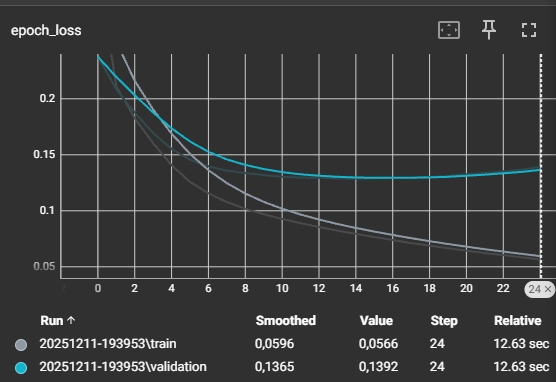

##### epoch_accuracy - точность обучения
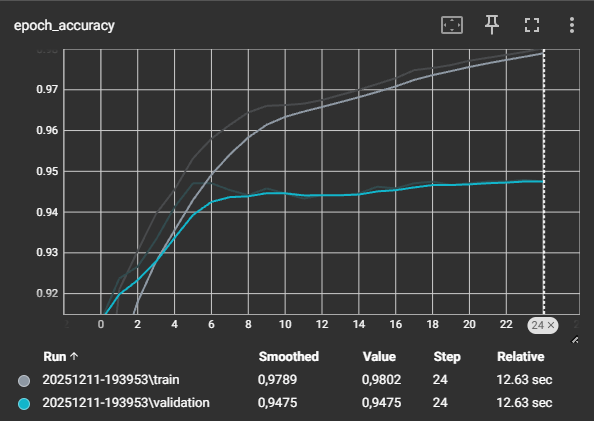

##### epoch_auc - AUC-ROC (ключевая метрика при дисбалансе)
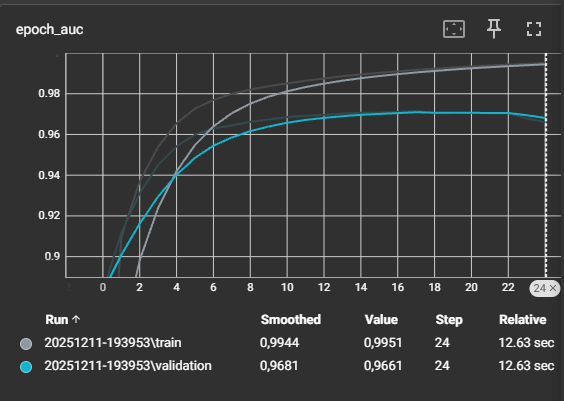

##### epoch_precision
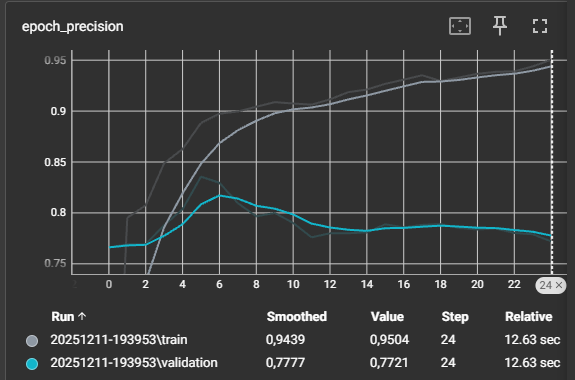

##### epoch_recall 
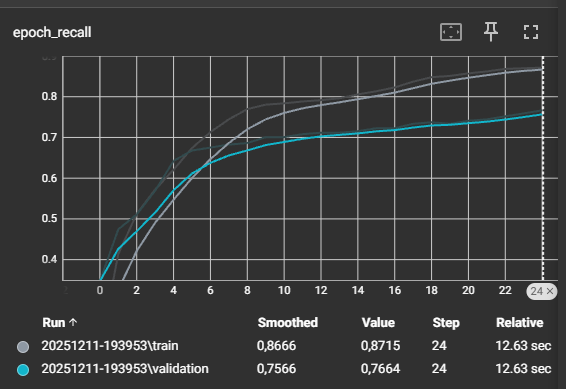

##### evaluation_accuracy_vs_iterations
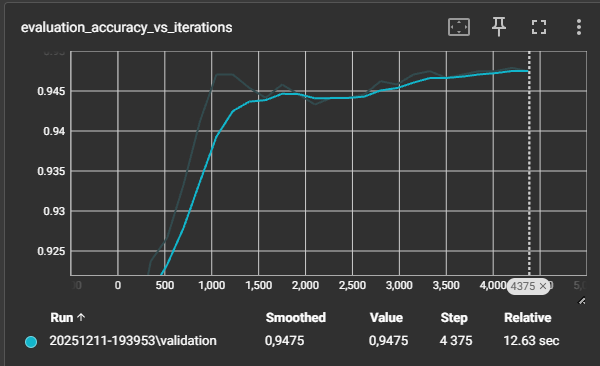

##### evaluation_auc_vs_iterations
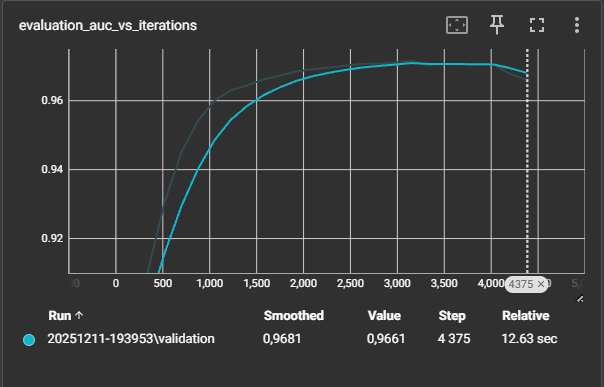

##### evaluation_loss_vs_iterations
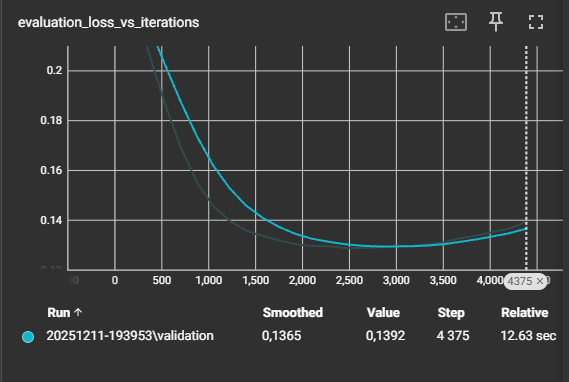

##### evaluation_precision_vs_iterations
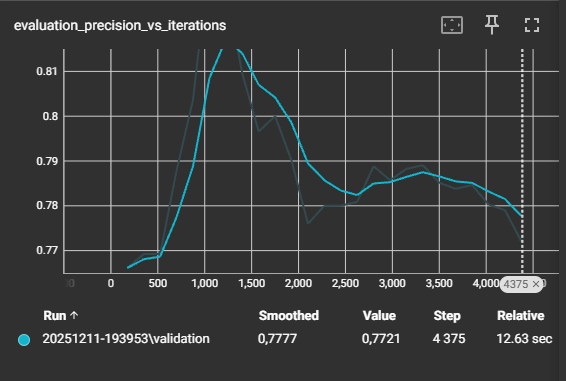

##### evaluation_recall_vs_iterations
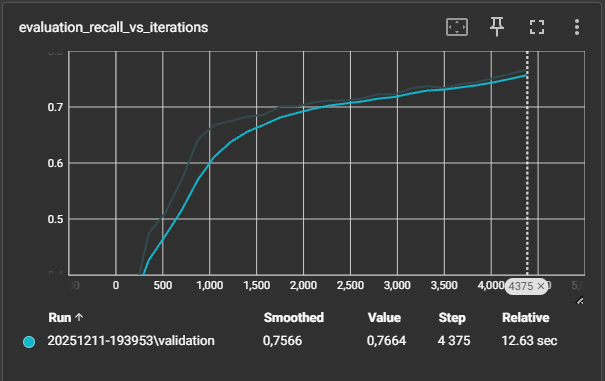
